**Important**
- Dont write all the code in single cell. create new cell for differnet functionality. 
- For analysis create markdown.
- Don't remove the cells output of .ipynb file that you will submit. 
- Comment your code and use meaningful variable name.

 **Q1:** Write a function **def ConvolutionOperation ( image, kernel):** that has arguments
- Image (Images may be of varying sizes and you may want to give the size as arguments. You can use the shape property in python.)
- Kernel H (Again, you should allow varying size Kernels.)

The output of the function should be the convolution of **I** with **H**. Test your function and show results on the following Kernels, using the provided sample images within the assignment.

- **i)** Averaging Kernel (3x3, 5x5, and 7x7)
- **ii)** Gaussian Kernel (σ = 1 with kernel size 3 x 3, 5 x 5, and 7 x 7)
- **iii)** Sobel Edge Operators:

                  -1 -2 -1           -1  0  1
                 [ 0  0  0 ]  and  [ -2  0  2 ]
                   1  2  1           -1  0  1
- **iv)** Prewitt Edge Operators: 

                  -1  0  1           1   1   1
                 [-1  0  1 ]  and  [ 0   0   0 ]
                  -1  0  1          -1  -1  -1
- **v)** Laplacian Operators:

                   1   1  1      
                 [ 1  -8  1 ]
                   1   1  1   

**Note:** You must perform convolution by writing your own code and comparing it with the result of the **cv2.filter2D()**.

**Marks : 45 + 5 points** 


The Average filter For Kernel of size 3x3:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Original image (315, 420) 
 [[108  98  98 ...  95  94 106]
 [ 99  89  88 ...  84  83  95]
 [ 98  89  88 ...  82  81  94]
 ...
 [202 198 193 ... 167 169 173]
 [194 193 192 ... 167 169 173]
 [200 199 198 ... 173 175 179]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Convoluted Image (315, 420) :
 [[ 98.  96.  94. ...  88.  89.  88.]
 [ 96.  95.  92. ...  86.  86.  86.]
 [ 94.  93.  90. ...  83.  83.  83.]
 ...
 [197. 196. 194. ... 168. 168. 169.]
 [196. 195. 193. ... 168. 168. 169.]
 [193. 193. 192. ... 168. 168. 169.]]

Compared with CV2 image (315, 420) :
 [[ 95  95  93 ...  87  91  91]
 [ 95  95  93 ...  86  90  90]
 [ 93  93  91 ...  83  87  87]
 ...
 [197 196 194 ... 169 170 170]
 [197 197 195 ... 170 172 172]
 [195 195 195 ... 170 172 172]]


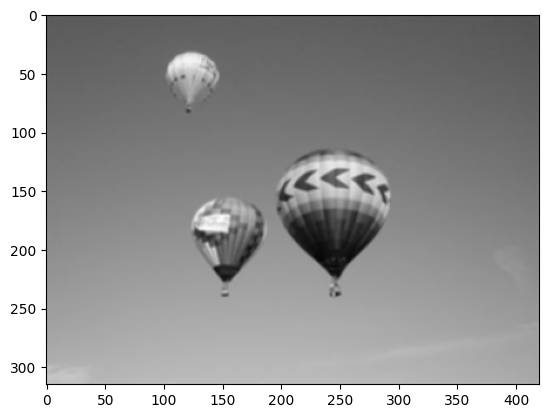

In [57]:
#AVG Kernel
#Abdul Aziz 
#BCSF19A026 Add/Drop
import numpy as np
import cv2
from matplotlib import pyplot as plt

def ConvolutionOperation(image, kernel):
    padded = np.pad(image, pad_width=int((len(kernel) - 1)/2),
                    mode='constant', constant_values=1)
    img = np.zeros(image.shape, np.float32)
    print("Original image", image.shape, "\n", image)
    #print("\nPadded image", padded.shape, "\n", padded)
    for i in range(0, len(padded) - ((len(kernel) + 1)/2).__floor__()):
        for j in range(0, len(padded[0]) - ((len(kernel) + 1)/2).__floor__()):
            sum = 0
            count = 0
            for k in range(0, len(kernel)):
                for l in range(0, len(kernel)):
                    if k+i > 0 and k+i < len(image) and l+j > 0 and l+j < len(image[0]):
                        sum += padded[k+i][l+j] * kernel[k][l]
                        count += 1
            if count > 0:
                img[i][j] = (sum / count).__floor__()

    return img


image = cv2.imread('balloon.jpg', 0)  # to read the image
# as we apply the 1 pixel padding from all sides so our kernel with size 3x3 will work perfrctly
print("The Average filter For Kernel of size 3x3:")
# you can also use the 5 x 5 pixel padding and 7 x 7 pixel padding  by changing
# the value of row and col
row = 3 # number of row of kernel
col = 3 # number of column of kernel
kernel = np.ones((row, col), np.float32)
print ( kernel)
C_img = ConvolutionOperation(image, kernel)
print("\nConvoluted Image", C_img.shape, ":\n", C_img)
dst = cv2.filter2D(image, -1, kernel/len(kernel)**2)
print("\nCompared with CV2 image", dst.shape, ":\n", dst)
plt.imshow(cv2.cvtColor(C_img, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

The Average filter For Kernel of size 3x3:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Original image (315, 420) 
 [[108  98  98 ...  95  94 106]
 [ 99  89  88 ...  84  83  95]
 [ 98  89  88 ...  82  81  94]
 ...
 [202 198 193 ... 167 169 173]
 [194 193 192 ... 167 169 173]
 [200 199 198 ... 173 175 179]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Convoluted Image (315, 420) :
 [[ 53.  57.  70. ...  65.  65.  65.]
 [ 57.  61.  75. ...  69.  69.  69.]
 [ 71.  75.  93. ...  86.  85.  86.]
 ...
 [148. 156. 195. ... 168. 168. 167.]
 [148. 157. 195. ... 168. 168. 167.]
 [148. 156. 194. ... 168. 168. 167.]]

Compared with CV2 image (315, 420) :
 [[ 92  93  93 ...  87  87  87]
 [ 93  94  94 ...  88  88  88]
 [ 93  94  94 ...  88  88  88]
 ...
 [196 196 195 ... 170 171 170]
 [196 196 195 ... 170 171 170]
 [196 195 195 ... 170 171 170]]


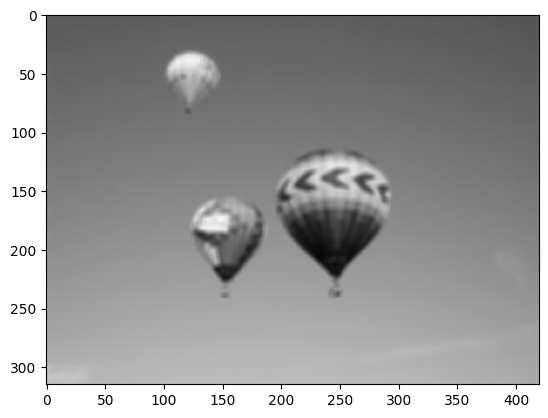

In [63]:
#Guassian Kernel
#Abdul Aziz 
#BCSF19A026 Add/Drop
import numpy as np
import cv2
from matplotlib import pyplot as plt

def ConvolutionOperation(image, kernel):
    padded = np.pad(image, pad_width=int((len(kernel) - 1)/2),
                    mode='constant', constant_values=1)
    img = np.zeros(image.shape, np.float32)
    print("Original image", image.shape, "\n", image)
    #print("\nPadded image", padded.shape, "\n", padded)
    for i in range(0, len(padded) - ((len(kernel) + 1)/2).__floor__()):
        for j in range(0, len(padded[0]) - ((len(kernel) + 1)/2).__floor__()):
            sum = 0
            count = 0
            for k in range(0, len(kernel)):
                for l in range(0, len(kernel)):
                    if k+i > 0 and k+i < len(image) and l+j > 0 and l+j < len(image[0]):
                        sum += padded[k+i][l+j] * kernel[k][l]
                        count += 1
            if count > 0:
                img[i][j] = (sum / count).__floor__()

    return img


image = cv2.imread('balloon.jpg', 0)  # to read the image
# as we apply the 1 pixel padding from all sides so our kernel with size 3x3 will work perfrctly
print("The Average filter For Kernel of size 3x3:")
# you can also use the 5 x 5 pixel padding and 7 x 7 pixel padding  by changing
# the value of row and col
row = 5 # number of row of kernel
col = 5 # number of column of kernel
kernel = np.ones((row, col), np.float32)
print ( kernel)
C_img = ConvolutionOperation(image, kernel)
print("\nConvoluted Image", C_img.shape, ":\n", C_img)
dst = cv2.filter2D(image, -1, kernel/len(kernel)**2)
print("\nCompared with CV2 image", dst.shape, ":\n", dst)
plt.imshow(cv2.cvtColor(C_img, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

The Sobel filter For Kernel of size 3x3:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Original image (315, 420) 
 [[108  98  98 ...  95  94 106]
 [ 99  89  88 ...  84  83  95]
 [ 98  89  88 ...  82  81  94]
 ...
 [202 198 193 ... 167 169 173]
 [194 193 192 ... 167 169 173]
 [200 199 198 ... 173 175 179]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Convoluted Image (315, 420) :
 [[ 71.   0.   1. ...   0.   0.   0.]
 [ 60.   0.   1. ...   0.   0.   0.]
 [ 59.   0.   1. ...   0.   0.   0.]
 ...
 [131.   0.   0. ...   0.   0.   0.]
 [146.   0.   0. ...   0.   0.   0.]
 [ 96.   0.   0. ...   0.   0.   0.]]

Compared with CV2 image (315, 420) :
 [[0 0 1 ... 0 5 0]
 [0 0 1 ... 0 5 0]
 [0 0 1 ... 0 5 0]
 ...
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 3 0]]
Original image (315, 420) 
 [[108  98  98 ...  95  94 106]
 [ 99  89  88 ...  84  83  95]
 [ 98  89  88 ...  82  81  94]
 ...
 [202 198 193 ... 167 169 173]
 [194 193 192 ... 167 169 173]
 [200 199 198 ... 173 175 179]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Convoluted Image (315, 420) :
 [[71. 60. 59. ... 55. 62. 41.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  0.  1.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]

Compared with CV2 image (315, 420) :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 2 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 2 ... 3 3 3]
 [0 0 0 ... 0 0 0]]


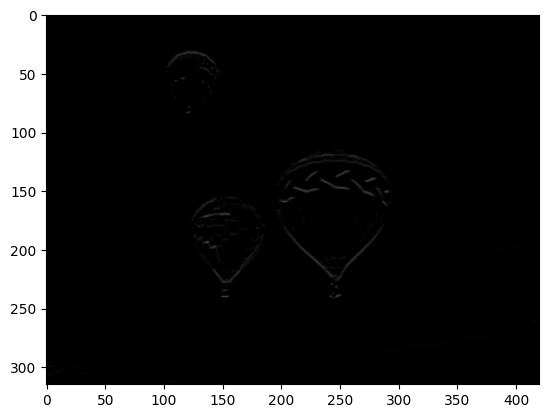

In [58]:
#Abdul Aziz 
#BCSF19A026 Add/Drop
import numpy as np
import cv2
from matplotlib import pyplot as plt

def ConvolutionOperation(image, kernel):
    padded = np.pad(image, pad_width=int((len(kernel) - 1)/2),
                    mode='constant', constant_values=1)
    img = np.zeros(image.shape, np.float32)
    print("Original image", image.shape, "\n", image)
    #print("\nPadded image", padded.shape, "\n", padded)
    for i in range(0, len(padded) - ((len(kernel) + 1)/2).__floor__()):
        for j in range(0, len(padded[0]) - ((len(kernel) + 1)/2).__floor__()):
            sum = 0
            count = 0
            for k in range(0, len(kernel)):
                for l in range(0, len(kernel)):
                    if k+i > 0 and k+i < len(image) and l+j > 0 and l+j < len(image[0]):
                        sum += padded[k+i][l+j] * kernel[k][l]
                        count += 1
            if sum > 0:
                img[i][j] = (sum / count).__floor__()
            else:
                img[i][j] = 0


    return img


image = cv2.imread('balloon.jpg', 0)  # to read the image
# as we apply the 1 pixel padding from all sides so our kernel with size 3x3 will work perfrctly
print("The Sobel filter For Kernel of size 3x3:")
# you can also use the 5 x 5 pixel padding and 7 x 7 pixel padding  by changing
# the value of row and col
row = 3 # number of row of kernel
col = 3 # number of column of kernel
kernel = np.array([[-1, 0, 1],[-2,0,2],[-1,0,1]]) # y filter2D
print ( kernel)
C_img = ConvolutionOperation(image, kernel)
print("\nConvoluted Image", C_img.shape, ":\n", C_img)
dst = cv2.filter2D(image, -1, kernel/len(kernel)**2)
print("\nCompared with CV2 image", dst.shape, ":\n", dst)
plt.imshow(cv2.cvtColor(C_img, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
kernel = np.array([[-1, -2, -1],[0,0,0],[1,2,1]]) # x filter2D
C_img = ConvolutionOperation(image, kernel)
print("\nConvoluted Image", C_img.shape, ":\n", C_img)
dst = cv2.filter2D(image, -1, kernel/len(kernel)**2)
print("\nCompared with CV2 image", dst.shape, ":\n", dst)
plt.imshow(cv2.cvtColor(C_img, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

The Prewitt Edge Operators filter For Kernel of size 3x3:
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
Original image (315, 420) 
 [[108  98  98 ...  95  94 106]
 [ 99  89  88 ...  84  83  95]
 [ 98  89  88 ...  82  81  94]
 ...
 [202 198 193 ... 167 169 173]
 [194 193 192 ... 167 169 173]
 [200 199 198 ... 173 175 179]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Convoluted Image (315, 420) :
 [[46.  0.  1. ...  0.  0.  0.]
 [46.  0.  1. ...  0.  0.  0.]
 [45.  0.  1. ...  0.  0.  0.]
 ...
 [98.  0.  0. ...  0.  0.  0.]
 [97.  0.  0. ...  0.  0.  0.]
 [96.  0.  0. ...  0.  0.  0.]]

Compared with CV2 image (315, 420) :
 [[0 0 1 ... 0 4 0]
 [0 0 1 ... 0 4 0]
 [0 0 1 ... 0 4 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 2 0]]
Original image (315, 420) 
 [[108  98  98 ...  95  94 106]
 [ 99  89  88 ...  84  83  95]
 [ 98  89  88 ...  82  81  94]
 ...
 [202 198 193 ... 167 169 173]
 [194 193 192 ... 167 169 173]
 [200 199 198 ... 173 175 179]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Convoluted Image (315, 420) :
 [[  0.   0.   0. ...   0.   0.   0.]
 [  3.   3.   3. ...   4.   4.   4.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  2.   1.   1. ...   0.   0.   0.]
 [100.  98.  96. ...  84.  84.  84.]
 [193. 193. 192. ... 168. 168. 169.]]

Compared with CV2 image (315, 420) :
 [[0 0 0 ... 0 0 0]
 [3 3 3 ... 4 4 4]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


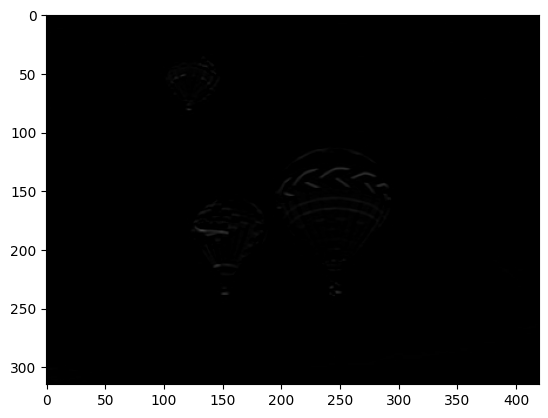

In [56]:
#Abdul Aziz 
#BCSF19A026 Add/Drop
import numpy as np
import cv2
from matplotlib import pyplot as plt

def ConvolutionOperation(image, kernel):
    padded = np.pad(image, pad_width=int((len(kernel) - 1)/2),
                    mode='constant', constant_values=1)
    img = np.zeros(image.shape, np.float32)
    print("Original image", image.shape, "\n", image)
    #print("\nPadded image", padded.shape, "\n", padded)
    for i in range(0, len(padded) - ((len(kernel) + 1)/2).__floor__()):
        for j in range(0, len(padded[0]) - ((len(kernel) + 1)/2).__floor__()):
            sum = 0
            count = 0
            for k in range(0, len(kernel)):
                for l in range(0, len(kernel)):
                    if k+i > 0 and k+i < len(image) and l+j > 0 and l+j < len(image[0]):
                        sum += padded[k+i][l+j] * kernel[k][l]
                        count += 1
            if sum > 0:
                img[i][j] = (sum / count).__floor__()
            else:
                img[i][j] = 0


    return img


image = cv2.imread('balloon.jpg', 0)  # to read the image
# as we apply the 1 pixel padding from all sides so our kernel with size 3x3 will work perfrctly
print("The Prewitt Edge Operators filter For Kernel of size 3x3:")
# you can also use the 5 x 5 pixel padding and 7 x 7 pixel padding  by changing
# the value of row and col
row = 3 # number of row of kernel
col = 3 # number of column of kernel
kernel = np.array([[-1, 0, 1],[-1,0,1],[-1,0,1]]) # y filter2D
print ( kernel)
C_img = ConvolutionOperation(image, kernel)
print("\nConvoluted Image", C_img.shape, ":\n", C_img)
dst = cv2.filter2D(image, -1, kernel/len(kernel)**2)
print("\nCompared with CV2 image", dst.shape, ":\n", dst)
plt.imshow(cv2.cvtColor(C_img, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
kernel = np.array([[1, 1, 1],[0,0,0],[-1,-1,-1]]) # x filter2D
C_img = ConvolutionOperation(image, kernel)
print("\nConvoluted Image", C_img.shape, ":\n", C_img)
dst = cv2.filter2D(image, -1, kernel/len(kernel)**2)
print("\nCompared with CV2 image", dst.shape, ":\n", dst)
plt.imshow(cv2.cvtColor(C_img, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

Provide analysis here...

The Laplacian filter For Kernel of size 3x3:
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]
Original image (315, 420) 
 [[108  98  98 ...  95  94 106]
 [ 99  89  88 ...  84  83  95]
 [ 98  89  88 ...  82  81  94]
 ...
 [202 198 193 ... 167 169 173]
 [194 193 192 ... 167 169 173]
 [200 199 198 ... 173 175 179]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Convoluted Image (315, 420) :
 [[  0.   0.   0. ...   0.   0.  88.]
 [  0.   6.   4. ...   2.   0.  86.]
 [  0.   4.   2. ...   1.   0.  83.]
 ...
 [  0.   0.   1. ...   1.   0. 169.]
 [  0.   0.   0. ...   0.   0. 169.]
 [193. 193. 192. ... 168. 168. 169.]]

Compared with CV2 image (315, 420) :
 [[0 0 0 ... 0 0 0]
 [0 6 5 ... 2 7 0]
 [0 4 3 ... 1 6 0]
 ...
 [0 0 1 ... 2 1 0]
 [3 4 3 ... 3 3 0]
 [0 0 0 ... 0 0 0]]


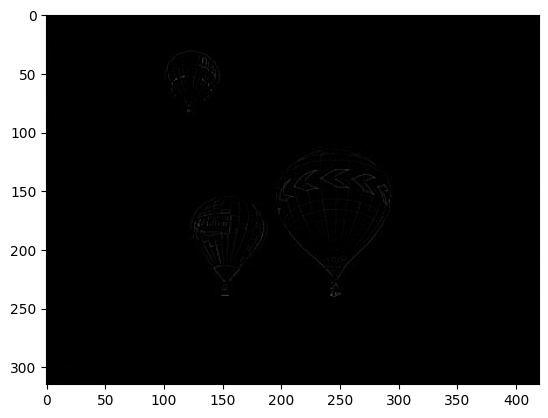

In [64]:
# Abdul Aziz
# BCSF19A026 Add/Drop
import numpy as np
import cv2
from matplotlib import pyplot as plt


def ConvolutionOperation(image, kernel):
    padded = np.pad(image, pad_width=int((len(kernel) - 1)/2),
                    mode='constant', constant_values=1)
    img = np.zeros(image.shape, np.float32)
    print("Original image", image.shape, "\n", image)
    #print("\nPadded image", padded.shape, "\n", padded)
    for i in range(0, len(padded) - ((len(kernel) + 1)/2).__floor__()):
        for j in range(0, len(padded[0]) - ((len(kernel) + 1)/2).__floor__()):
            sum = 0
            count = 0
            for k in range(0, len(kernel)):
                for l in range(0, len(kernel)):
                    if k+i > 0 and k+i < len(image) and l+j > 0 and l+j < len(image[0]):
                        sum += padded[k+i][l+j] * kernel[k][l]
                        count += 1
            if sum > 0:
                img[i][j] = (sum / count).__floor__()
            else:
                img[i][j] = 0

    return img


image = cv2.imread('balloon.jpg', 0)  # to read the image
# as we apply the 1 pixel padding from all sides so our kernel with size 3x3 will work perfrctly
print("The Laplacian filter For Kernel of size 3x3:")
# you can also use the 5 x 5 pixel padding and 7 x 7 pixel padding  by changing
# the value of row and col
row = 3  # number of row of kernel
col = 3  # number of column of kernel
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])  # x filter2D
print(kernel)
C_img = ConvolutionOperation(image, kernel)
print("\nConvoluted Image", C_img.shape, ":\n", C_img)
dst = cv2.filter2D(image, -1, kernel/len(kernel)**2)
print("\nCompared with CV2 image", dst.shape, ":\n", dst)
plt.imshow(cv2.cvtColor(C_img, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


**Q2:** Convert the **balloon.jpg** image to a grayscale image and add random noise to it (assume the noisy image name is **balloonGrayNoisy.jpg**). Apply the generated Averaging and Gaussian Kernels on the **“balloonGrayNoisy.jpg”** image to perform noise filtering and show the outputs. Test different filter sizes.

**Marks : 8 + 2 points**

In [6]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt


#   Image reading as grayscale
image = cv2.imread('balloon.jpg', 0)
print (image)



[[108  98  98 ...  95  94 106]
 [ 99  89  88 ...  84  83  95]
 [ 98  89  88 ...  82  81  94]
 ...
 [202 198 193 ... 167 169 173]
 [194 193 192 ... 167 169 173]
 [200 199 198 ... 173 175 179]]


In [7]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt


#   Image reading as grayscale
image = cv2.imread('balloon.jpg', 0)

#   Specifying Gaussian mean and std
mean = 0.0   # some constant
std = 15.0    # some constant (standard deviation)


noisy_img = image + np.random.normal(mean, std, image.shape)
noisy_img_clipped = np.clip(noisy_img, 0, 255)  # we might get out of bounds due to noise

cv2.imwrite('noisy_balloon.jpg', noisy_img_clipped)

True

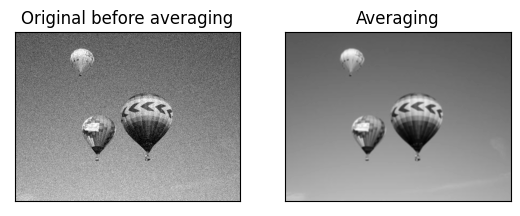

In [9]:

kernel = np.ones((3, 3),np.float32)/9
dst = cv2.filter2D(image, -1, kernel)

plt.subplot(121)
plt.imshow(noisy_img_clipped,cmap='gray')
plt.title('Original before averaging')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
#plt.imshow(dst)
plt.imshow(dst, cmap='gray')
plt.title('Averaging')
plt.xticks([]) # empyt square braketts for no axis
plt.yticks([])
plt.show()

Provide analysis here...

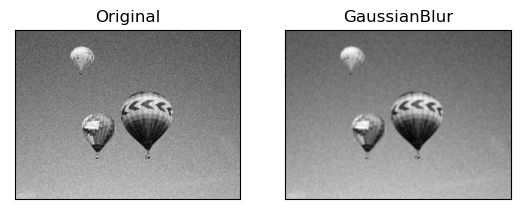

In [32]:
gaussian_blur = cv2.GaussianBlur(src=noisy_img_clipped, ksize=(5,5), sigmaX=0, sigmaY=0) # sigmaX and sigmaY, these are the Gaussian kernel standard deviations, in the X (horizontal) and Y (vertical) direction.

plt.subplot(121),plt.imshow(noisy_img_clipped,cmap='gray'),plt.title('Original',)
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(gaussian_blur,cmap='gray'),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

**Q3:** Perform edge detection on the **“linux.jpg”** using the Sobel and Prewitt Operators and show the outputs (Convert the image to grayscale, smooth the image using a Gaussian filter, compute horizontal and vertical gradients and then the magnitude of the gradient. Apply a threshold.)

**Marks : 8 + 2 points**

In [14]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

# Read the image
L_image = cv2.imread('linux.jpg')

In [13]:
# Convert to graycsale
image_gray = cv2.cvtColor(L_image, cv2.COLOR_BGR2GRAY)

# Apply Guassian blur to smooth the image
image_smooth = cv2.GaussianBlur(image_gray, (3, 3), 1)

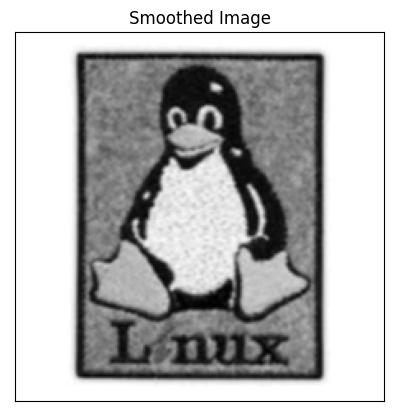

In [12]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

# Read the image
L_image = cv2.imread('linux.jpg')
# Convert to graycsale
image_gray = cv2.cvtColor(L_image, cv2.COLOR_BGR2GRAY)

# Apply Guassian blur to smooth the image
image_smooth = cv2.GaussianBlur(image_gray, (3, 3), 1)
# Plot the image

plt.imshow(image_smooth, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([])
plt.yticks([])
plt.show()

Provide analysis here...

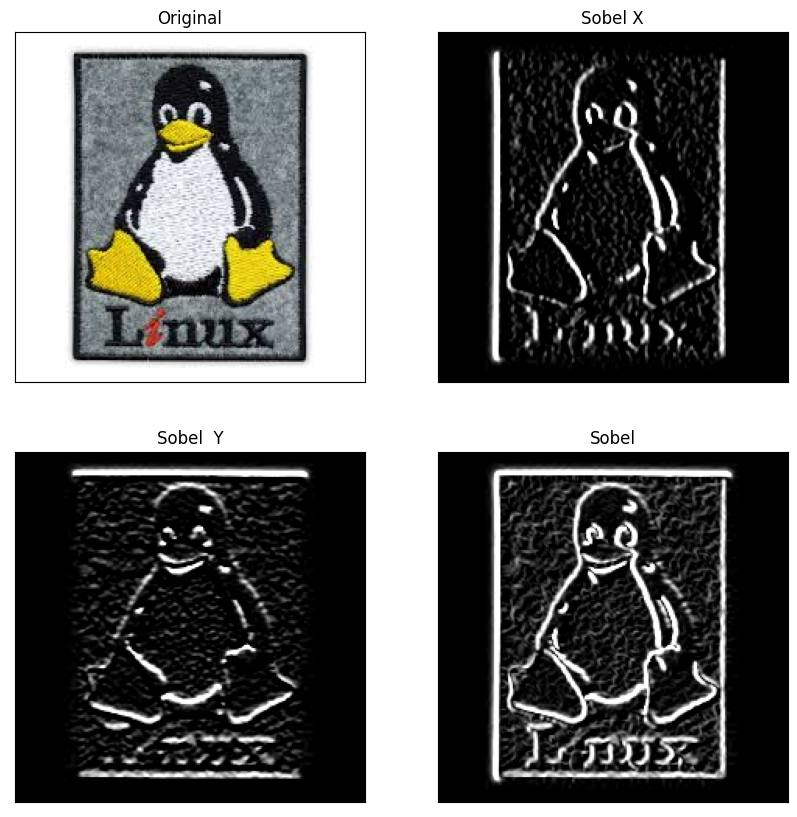

In [16]:

kernelx = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

kernely = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

img_Sobelx = cv2.filter2D(image_smooth, cv2.CV_32F, kernelx)
img_Sobelx = np.clip(img_Sobelx, 0, 255)

img_Sobely = cv2.filter2D(image_smooth, cv2.CV_32F, kernely)
img_Sobely = np.clip(img_Sobely, 0, 255)


img_Sobel = cv2.magnitude(img_Sobelx, img_Sobely)
img_Sobel = np.clip(img_Sobel, 0, 255)

# Display Sobel Edge Detection Images
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(L_image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(222)
plt.imshow(img_Sobelx, cmap=plt.get_cmap('gray'))
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(img_Sobely, cmap=plt.get_cmap('gray'))
plt.title('Sobel  Y')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(img_Sobel, cmap=plt.get_cmap('gray'))
plt.title('Sobel')
plt.xticks([])
plt.yticks([])
plt.savefig('SOBEL', bbox_inches='tight')
plt.show()

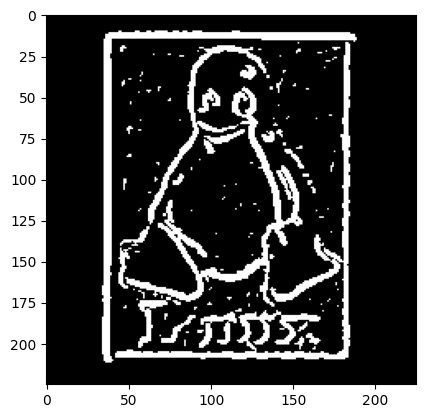

In [17]:
thresh = 100#125
rows,cols = img_Sobel.shape
i = 0
j = 0
newimg = np.zeros((rows ,cols),dtype = np.uint8 )
for i in range ( rows ) :
    for j in range ( cols ) :
        if ( img_Sobel [ i , j ] > thresh ) :
            newimg [ i , j ] = 1
        else :
            newimg [ i , j ] = 0
plt.imshow ( newimg ,cmap = "gray")
plt.show ()

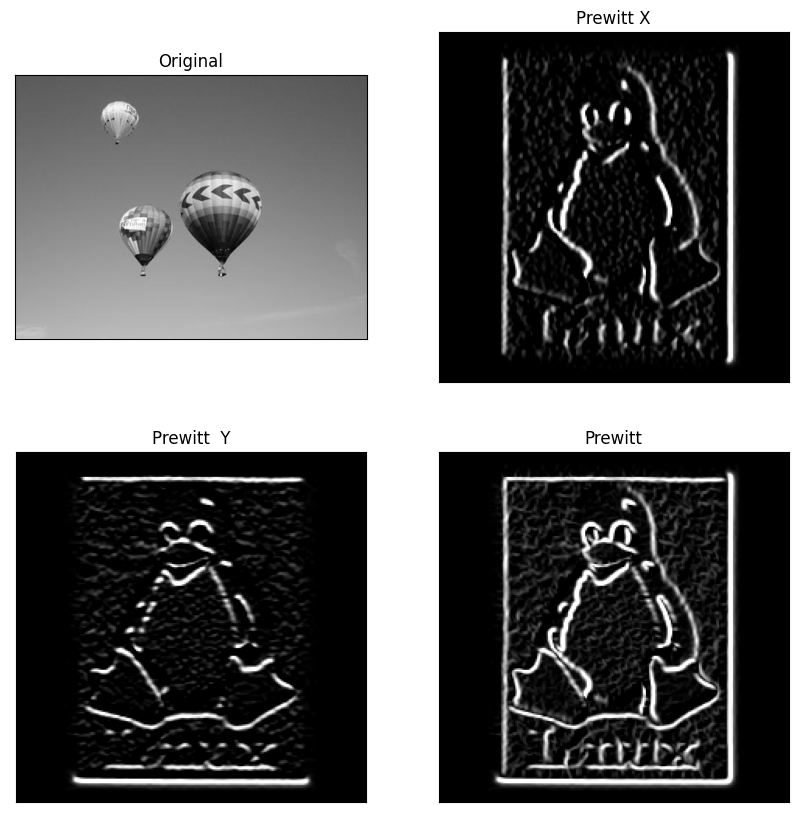

In [21]:
#prewitt
kernelx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

kernely = np.array([[-1, -1, -1],
                    [0, 0, 0],
                    [1, 1, 1]])

img_prewittx = cv2.filter2D(image_smooth, cv2.CV_32F, kernelx)
img_prewittx = np.clip(img_prewittx, 0, 255)

img_prewitty = cv2.filter2D(image_smooth, cv2.CV_32F, kernely)
img_prewitty = np.clip(img_prewitty, 0, 255)


img_prewitt = cv2.magnitude(img_prewittx, img_prewitty)
img_prewitt = np.clip(img_prewitt, 0, 255)

# Display prewitt Edge Detection Images
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(222)
plt.imshow(img_prewittx, cmap=plt.get_cmap('gray'))
plt.title('Prewitt X')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(img_prewitty, cmap=plt.get_cmap('gray'))
plt.title('Prewitt  Y')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(img_prewitt, cmap=plt.get_cmap('gray'))
plt.title('Prewitt')
plt.xticks([])
plt.yticks([])
plt.savefig('Prewitt', bbox_inches='tight')
plt.show()

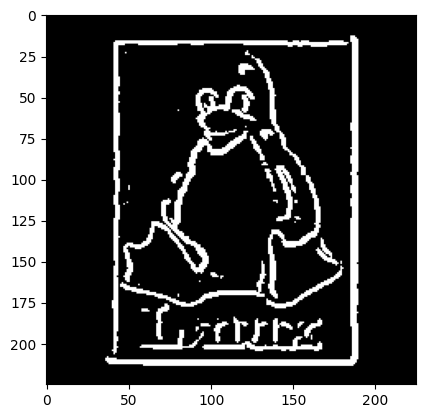

In [22]:
thresh = 100 #125
rows,cols = img_prewitt.shape
i = 0
j = 0
newimg = np.zeros((rows ,cols),dtype = np.uint8 )
for i in range ( rows ) :
    for j in range ( cols ) :
        if ( img_prewitt [ i , j ] > thresh ) :
            newimg [ i , j ] = 1
        else :
            newimg [ i , j ] = 0
plt.imshow ( newimg ,cmap = "gray")
plt.show ()

**Q4:** Perform edge detection on the **“linux.jpg”** using the Laplacian Operators and show the outputs (Convert the image to grayscale, smooth the image using a Gaussian filter, Compute the output image using the Laplacian operator and then apply a threshold.)

**Marks : 8 + 2 points**

In [23]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

# Read the image
L_img = cv2.imread('linux.jpg')

In [24]:
# Convert to graycsale
img_gray = cv2.cvtColor(L_img, cv2.COLOR_BGR2GRAY)

# Apply Guassian blur to smooth the image
img_smooth = cv2.GaussianBlur(img_gray, (3, 3), 1)

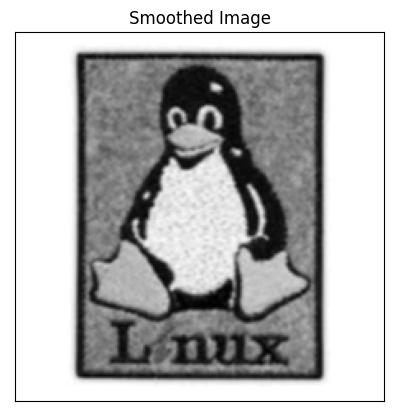

In [25]:
# Plot the image

plt.imshow(img_smooth, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([])
plt.yticks([])
plt.show()

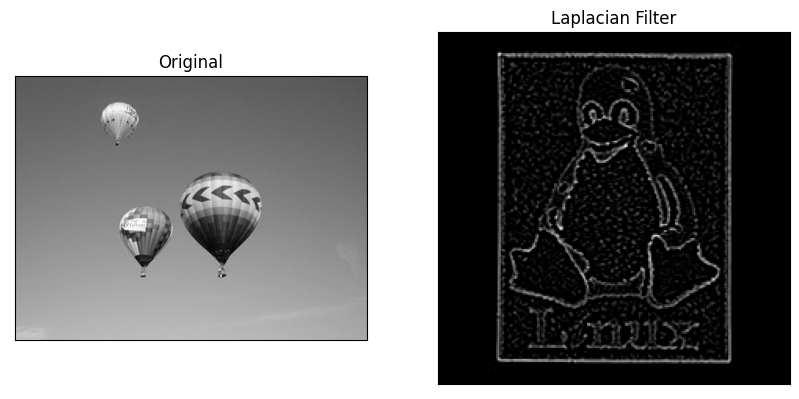

In [30]:
import numpy as np
import sys
#laplacian
laplacian_kernel1 = np.array([[0, 1, 0], 
                             [1, -4, 1],
                             [0, 1, 0]])

laplacian_result1 = cv2.filter2D(img_smooth, -1, laplacian_kernel1)
laplacian_result1 = np.clip(laplacian_result1, 0, 255)


# Display Laplacian Edge Detection Images
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(laplacian_result1, cmap=plt.get_cmap('gray'))
plt.title('Laplacian Filter')
plt.xticks([])
plt.yticks([])
plt.savefig('Laplacian', bbox_inches='tight')
plt.show()

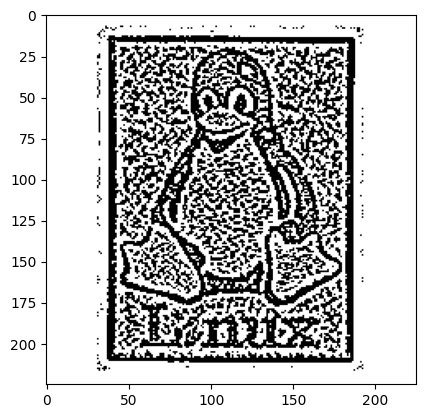

In [69]:
thresh = 0#125
rows,cols = laplacian_result1.shape
i = 0
j = 0
newimg = np.zeros((rows ,cols),dtype = np.uint8 )
for i in range ( rows ) :
    for j in range ( cols ) :
        if ( laplacian_result1 [ i , j ] > thresh ) :
            newimg [ i , j ] = 0
        else :
            newimg [ i , j ] = 1
plt.imshow ( newimg ,cmap = "gray")
plt.show ()

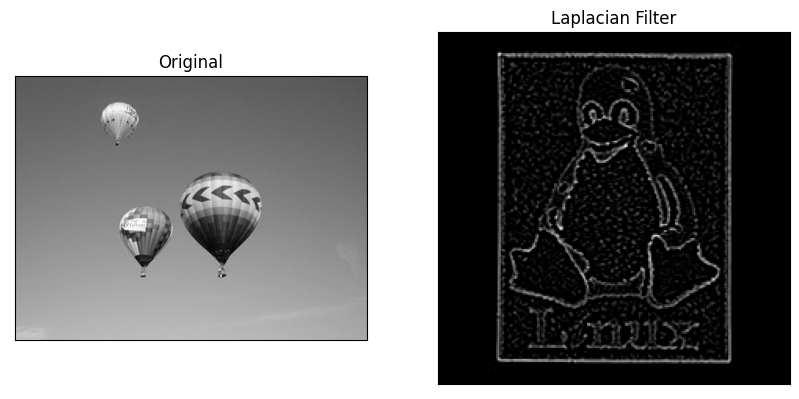

In [34]:
#laplacian
import numpy as np
import cv2
laplacian_kernel2 = np.array([[1, 1, 1], 
                             [1, -8, 1],
                             [1, 1, 1]])

laplacian_result2 = cv2.filter2D(img_smooth, -1, laplacian_kernel2)
laplacian_result2 = np.clip(laplacian_result1, 0, 255)


# Display Laplacian Edge Detection Images
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(laplacian_result2, cmap=plt.get_cmap('gray'))
plt.title('Laplacian Filter')
plt.xticks([])
plt.yticks([])
plt.savefig('All directions Laplacian', bbox_inches='tight')
plt.show()

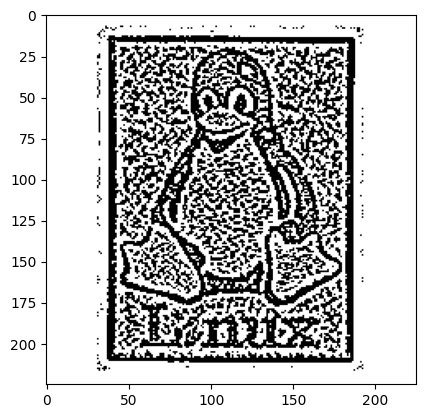

In [71]:
thresh = 0
rows,cols = laplacian_result2.shape
i = 0
j = 0
newimg = np.zeros((rows ,cols),dtype = np.uint8 )
for i in range ( rows ) :
    for j in range ( cols ) :
        if ( laplacian_result2 [ i , j ] > thresh ) :
            newimg [ i , j ] = 0
        else :
            newimg [ i , j ] = 1
plt.imshow ( newimg ,cmap = "gray")
plt.show ()

Provide analysis here...

**Q5:** Perform edge detection on the **“linux.jpg”** using the Canny edge detection algorithm and show the outputs (Convert the image to grayscale, smooth the image using a Gaussian filter, Compute the magnitude and gradient using the Sobal operator, apply non-maximum suppression, and then apply double thresholding (Hysteresis))

**Marks : 8 + 2 points**

In [36]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

# Read the image
L_img = cv2.imread('linux.jpg')

In [37]:
# Convert to graycsale
import numpy as np
import cv2
img_gray = cv2.cvtColor(L_img, cv2.COLOR_BGR2GRAY)

# Apply Guassian blur to smooth the image
img_smooth = cv2.GaussianBlur(img_gray, (3, 3), 1)

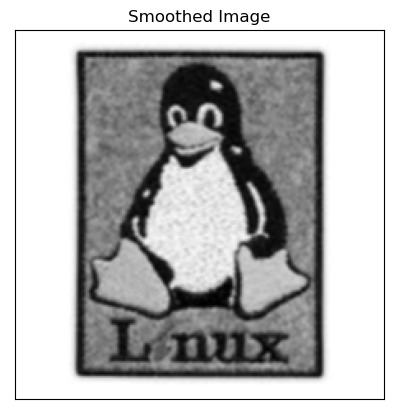

In [106]:
# Plot the image
import numpy as np
import cv2
plt.imshow(img_smooth, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([])
plt.yticks([])
plt.show()

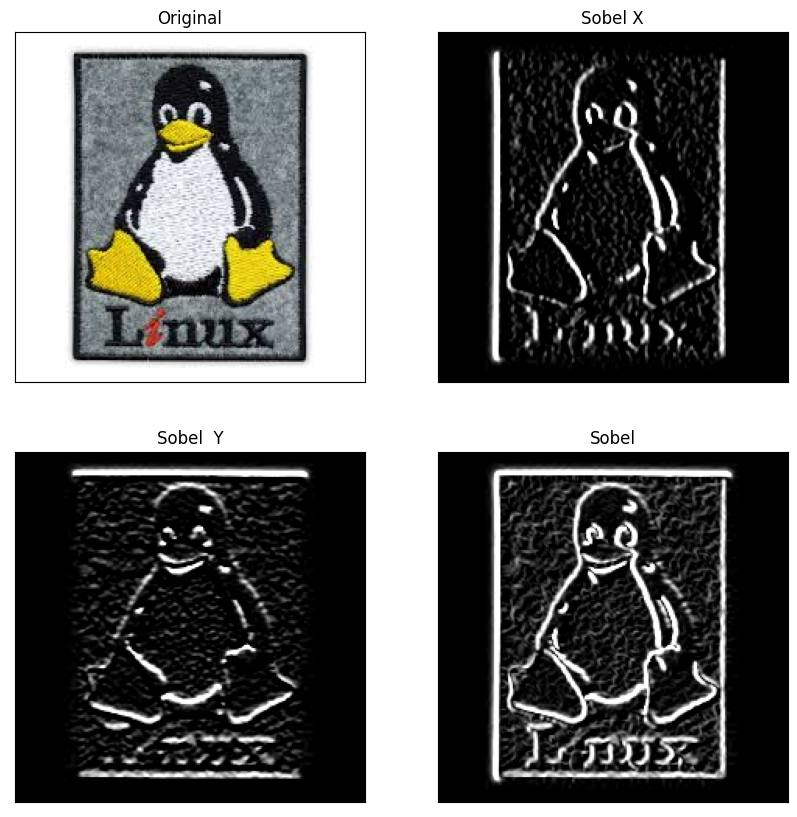

In [38]:
import numpy as np
import cv2
kernelx = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

kernely = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

img_Sobelx = cv2.filter2D(img_smooth, cv2.CV_32F, kernelx)
img_Sobelx = np.clip(img_Sobelx, 0, 255)

img_Sobely = cv2.filter2D(img_smooth, cv2.CV_32F, kernely)
img_Sobely = np.clip(img_Sobely, 0, 255)


img_Sobel = cv2.magnitude(img_Sobelx, img_Sobely)
img_Sobel = np.clip(img_Sobel, 0, 255)

# Display Sobel Edge Detection Images
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(L_img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])


plt.subplot(222)
plt.imshow(img_Sobelx, cmap=plt.get_cmap('gray'))
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(img_Sobely, cmap=plt.get_cmap('gray'))
plt.title('Sobel  Y')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(img_Sobel, cmap=plt.get_cmap('gray'))
plt.title('Sobel')
plt.xticks([])
plt.yticks([])
plt.savefig('SOBEL', bbox_inches='tight')
plt.show()

Provide analysis here...

**Q6:** Perform the following on the "linux.jpg":
- Split the three channels of rgb image into R,G,B.
- Calculate threshold value by calculating mean in every channel array.
- Apply thresholding on all the three images(R,G,B).
- Merge R,G,B
- Show the results and difference.

**Marks : 12 + 3 points**

In [79]:
#code
#Abdul Aziz 
#BCSF19A026 Add/Drop
import numpy as np
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('linux.jpg')
red = image[:,:,0]
blue = image[:,:,2]
green = image[:,:,1]
thresh_red = np.mean(red)
thresh_blue = np.mean(blue)
thresh_gree = np.mean(green)
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Provide analysis here...

**Q7:** Perform canny edge detection on video.
- Record your own video of maximum 30 seconds.
- Apply canny edge detection.
- Also send the processed video along with code file.

**Marks : 40 + 5 points**

In [77]:
import numpy as np
import cv2
import sys

video_watch = cv2.VideoCapture("video.mp4")


while video_watch.isOpened():
    ret, frame = video_watch.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame. Exiting!!!")
        break
        
        
    # Convert to graycsale
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Guassian blur to smooth the image
    img_smooth = cv2.GaussianBlur(img_gray, (3, 3), sigmaX = 0, sigmaY = 0) 
    
    # Canny Edge Detection
    edges = cv2.Canny(image = img_smooth, threshold1 = 100, threshold2 = 200)
    cv2.imshow('frame', edges)
    #cv2.imshow('frame', frame)
    
    im_concat = cv2.hconcat([ edges,img_gray])
    im_concat = cv2.resize(im_concat, (1540, 540))
    #cv2.imshow('Road Lane Detection', im_concat)
    
    # setting "q" as exiting 
    if cv2.waitKey(1) == ord('q'):
        break
        
video_watch.release()
cv2.destroyAllWindows()

Can't receive frame. Exiting!!!
